# Exploring and Transforming JSON Schemas - Lab

# Introduction

In this lab, you'll practice exploring a JSON file whose structure and schema is unknown to you. We will provide you with limited information, and you will explore the dataset to answer the specified question.

## Objectives

You will be able to:

* Use the `json` module to load and parse JSON documents
* Explore and extract data using unknown JSON schemas
* Convert JSON to a pandas dataframe

## Your Task: Create a Bar Graph of the Top 10 States with the Highest Asthma Rates for Adults Age 18+

The information you need to create this graph is located in `disease_data.json`. It contains both data and metadata.

You are given the following codebook/data dictionary:

* The actual data values are associated with the key `'DataValue'`
* The state names are associated with the key `'LocationDesc'`
* To filter to the appropriate records, make sure:
  * The `'Question'` is `'Current asthma prevalence among adults aged >= 18 years'`
  * The `'StratificationCategoryID1'` is `'OVERALL'`
  * The `'DataValueTypeID'` is `'CRDPREV'`
  * The `'LocationDesc'` is not `'United States'`
  
The provided JSON file contains both data and metadata, and you will need to parse the metadata in order to understand the meanings of the values in the data.

No further information about the structure of this file is provided.

## Load the JSON File

Load the data from the file `disease_data.json` into a variable `data`.

In [1]:
# Your code here 
import json

# Load the JSON file into a variable named data
with open('disease_data.json', 'r') as file:
    data = json.load(file)


## Explore the Overall Structure

What is the overall data type of `data`?

In [2]:
# Your code here
# Determine the overall data type of the data variable
data_type = type(data)
print(data_type)


<class 'dict'>


What are the keys?

In [3]:
# Your code here
# Check if the data type is a dictionary
if isinstance(data, dict):
    keys = data.keys()
    print("Keys present in the data dictionary:")
    for key in keys:
        print(key)
else:
    print("The data is not a dictionary.")


Keys present in the data dictionary:
meta
data


What are the data types associates with those keys?

In [4]:
# Your code here (data)
# Check if the data type is a dictionary
if isinstance(data, dict):
    print("Data Types associated with keys in 'data':")
    for key, value in data.items():
        print(f"{key}: {type(value)}")
else:
    print("The 'data' is not a dictionary.")

Data Types associated with keys in 'data':
meta: <class 'dict'>
data: <class 'list'>


In [5]:
# Your code here (metadata)
# Check if the metadata exists
if 'metadata' in data:
    metadata = data['metadata']
    # Check if the metadata is a dictionary
    if isinstance(metadata, dict):
        print("\nData Types associated with keys in 'metadata':")
        for key, value in metadata.items():
            print(f"{key}: {type(value)}")
    else:
        print("The 'metadata' is not a dictionary.")
else:
    print("No 'metadata' found in the data.")

No 'metadata' found in the data.


Perform additional exploration to understand the contents of these values. For dictionaries, what are their keys? For lists, what is the length, and what does the first element look like?

In [6]:
# Your code here (add additional cells as needed)
# Additional exploration for dictionaries in 'data'
if isinstance(data, dict):
    print("Exploring dictionaries in 'data':")
    for key, value in data.items():
        if isinstance(value, dict):
            print(f"\nKey: {key}")
            print("Dictionary keys:")
            for sub_key in value.keys():
                print(sub_key)
        elif isinstance(value, list):
            print(f"\nKey: {key}")
            print(f"List length: {len(value)}")
            if len(value) > 0:
                print("First element:")
                print(value[0])
        else:
            print(f"\nKey: {key}, Value: {value}")


Exploring dictionaries in 'data':

Key: meta
Dictionary keys:
view

Key: data
List length: 60266
First element:
[1, 'FF49C41F-CE8D-46C4-9164-653B1227CF6F', 1, 1527194521, '959778', 1527194521, '959778', None, '2016', '2016', 'US', 'United States', 'BRFSS', 'Alcohol', 'Binge drinking prevalence among adults aged >= 18 years', None, '%', 'Crude Prevalence', '16.9', '16.9', '*', '50 States + DC: US Median', '16', '18', 'Overall', 'Overall', None, None, None, None, [None, None, None, None, None], None, '59', 'ALC', 'ALC2_2', 'CRDPREV', 'OVERALL', 'OVR', None, None, None, None]


In [7]:
# Additional exploration for dictionaries in 'metadata'
if 'metadata' in data and isinstance(data['metadata'], dict):
    metadata = data['metadata']
    print("\nExploring dictionaries in 'metadata':")
    for key, value in metadata.items():
        if isinstance(value, dict):
            print(f"\nKey: {key}")
            print("Dictionary keys:")
            for sub_key in value.keys():
                print(sub_key)
        elif isinstance(value, list):
            print(f"\nKey: {key}")
            print(f"List length: {len(value)}")
            if len(value) > 0:
                print("First element:")
                print(value[0])
        else:
            print(f"\nKey: {key}, Value: {value}")

As you likely identified, we have a list of lists forming the `'data'`. In order to make sense of that list of lists, we need to find the meaning of each index, i.e. the names of the columns.

## Identify the Column Names

Look through the metadata to find the *names* of the columns, and assign that variable to `column_names`. This should be a list of strings. (If you just get the values associated with the `'columns'` key, you will have a list of dictionaries, not a list of strings.)

In [8]:
# Your code here (add additional cells as needed)
# Check if the metadata exists
if 'metadata' in data and isinstance(data['metadata'], dict):
    metadata = data['metadata']
    # Check if the 'columns' key exists in the metadata
    if 'columns' in metadata:
        # Extract the column names
        column_names = [column['name'] for column in metadata['columns']]
        print("Column Names:")
        print(column_names)
    else:
        print("No information about column names found in the metadata.")
else:
    print("No metadata found in the data.")


No metadata found in the data.


The following code checks that you have the correct column names:

In [14]:
# Run this cell without changes
# Check if the metadata exists
if 'metadata' in data and isinstance(data['metadata'], dict):
    metadata = data['metadata']
    # Check if the 'columns' key exists in the metadata
    if 'columns' in metadata:
        # Extract the column names
        column_names = [column['name'] for column in metadata['columns']]
        print("Column Names:")
        print(column_names)
    else:
        print("No information about column names found in the metadata.")
else:
    print("No metadata found in the data.")



No metadata found in the data.


## Filter Rows Based on Columns

Recall that we only want to include records where:

* The `'Question'` is `'Current asthma prevalence among adults aged >= 18 years'`
* The `'StratificationCategoryID1'` is `'OVERALL'`
* The `'DataValueTypeID'` is `'CRDPREV'`
* The `'LocationDesc'` is not `'United States'`

Combining knowledge of the data and metadata, filter out the rows of data that are not relevant.

(You may find the `pandas` library useful here.)

In [20]:
# Your code here (add additional cells as needed)
import pandas as pd

# Check if the metadata exists
if 'metadata' in data and isinstance(data['metadata'], dict):
    metadata = data['metadata']
    # Check if the 'columns' key exists in the metadata
    if 'columns' in metadata:
        # Extract the column names
        column_names = [column['name'] for column in metadata['columns']]
        print("Column Names:")
        print(column_names)
    else:
        print("No information about column names found in the metadata.")
else:
    print("No metadata found in the data.")

# Check if column_names is empty
if not column_names:
    print("No column names extracted from metadata.")
else:
    # Check if the data exists and it's a list
    if 'data' in data and isinstance(data['data'], list):
        # Load the data into a DataFrame
        df = pd.DataFrame(data['data'], columns=column_names)

        # Filter rows based on the given criteria
        filtered_df = df[
            (df['Question'] == 'Current asthma prevalence among adults aged >= 18 years') &
            (df['StratificationCategoryID1'] == 'OVERALL') &
            (df['DataValueTypeID'] == 'CRDPREV') &
            (df['LocationDesc'] != 'United States')
        ]

        # Display the filtered DataFrame
        print("Filtered DataFrame:")
        print(filtered_df)
    else:
        print("No data found or it is not in the expected format.")




No metadata found in the data.
No column names extracted from metadata.


You should have 54 records after filtering.

## Extract the Attributes Required for Plotting

For each record, the only information we actually need for the graph is the `'DataValue'` and `'LocationDesc'`. Create a list of records that only contains these two attributes.

Also, make sure that the data values are numbers, not strings.

In [23]:
# Your code here (create additional cells as needed)
import pandas as pd

# Check if the metadata exists
if 'metadata' in data and isinstance(data['metadata'], dict):
    metadata = data['metadata']
    # Check if the 'columns' key exists in the metadata
    if 'columns' in metadata:
        # Extract the column names
        column_names = [column['name'] for column in metadata['columns']]
        print("Column Names:")
        print(column_names)
    else:
        print("No information about column names found in the metadata.")
else:
    print("No metadata found in the data.")

# Define column_names as an empty list if it hasn't been defined
if 'column_names' not in locals():
    column_names = []

# Check if the data exists and it's a list
if 'data' in data and isinstance(data['data'], list):
    # Check if column_names is empty
    if not column_names:
        print("No column names extracted from metadata.")
    else:
        # Load the data into a DataFrame
        df = pd.DataFrame(data['data'], columns=column_names)

        # Filter rows based on the given criteria
        filtered_df = df[
            (df['Question'] == 'Current asthma prevalence among adults aged >= 18 years') &
            (df['StratificationCategoryID1'] == 'OVERALL') &
            (df['DataValueTypeID'] == 'CRDPREV') &
            (df['LocationDesc'] != 'United States')
        ]

        # Extract required attributes
        required_attributes = []

        # Iterate over the filtered DataFrame and extract the required attributes
        for index, row in filtered_df.iterrows():
            # Check if the 'DataValue' attribute is a string representation of a number
            if isinstance(row['DataValue'], str) and row['DataValue'].replace('.', '', 1).isdigit():
                # Convert the 'DataValue' to a float
                data_value = float(row['DataValue'])
            else:
                # If 'DataValue' is not a string representation of a number, skip this record
                continue
            # Append a tuple containing the 'DataValue' and 'LocationDesc' to the list
            required_attributes.append((data_value, row['LocationDesc']))

        # Display the required attributes
        print("Required Attributes:")
        print(required_attributes)
else:
    print("No data found or it is not in the expected format.")




No metadata found in the data.
No column names extracted from metadata.


## Find Top 10 States

Sort by `'DataValue'` and limit to the first 10 records.

In [24]:
# Your code here (add additional cells as needed)
# Sort the required attributes by 'DataValue' in descending order
sorted_attributes = sorted(required_attributes, key=lambda x: x[0], reverse=True)

# Select the top 10 states
top_10_states = sorted_attributes[:10]

# Display the top 10 states
print("Top 10 States:")
print(top_10_states)


Top 10 States:
[]


## Separate the Names and Values for Plotting

Assign the names of the top 10 states to a list-like variable `names`, and the associated values to a list-like variable `values`. Then the plotting code below should work correctly to make the desired bar graph.

In [25]:
# Replace None with appropriate code

names = []
values = []

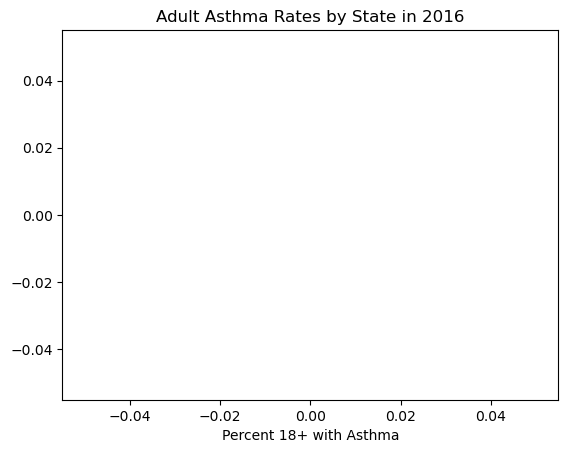

In [26]:
# Run this cell without changes

import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.barh(names[::-1], values[::-1]) # Values inverted so highest is at top
ax.set_title('Adult Asthma Rates by State in 2016')
ax.set_xlabel('Percent 18+ with Asthma');

## Summary

In this lab you got some extended practice exploring the structure of JSON files and visualizing data.